In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score



## Import data

In [3]:
basement = pd.read_csv (r'C:\Users\serdoun1\Desktop\Article_Petrophysics\Results\Prediction_GET_Basement.csv')
basin = pd.read_csv (r'C:\Users\serdoun1\Desktop\Article_Petrophysics\Results\Prediction_GET_Sandstone.csv')

basement['Label'] = 'Basement'
basin['Label'] = 'Basin'
data = pd.concat ([basin, basement], sort = False, axis = 0)

In [7]:
## Import données

graphite = pd.read_csv (r'C:\Users\serdoun1\Desktop\Article_Petrophysics\Data\Drilling_GRL\Geology_Graphite.csv', encoding = 'unicode_escape', on_bad_lines = 'skip')
argilization = pd.read_csv (r'C:\Users\serdoun1\Desktop\Article_Petrophysics\Data\Drilling_GRL\Geology_Alt_Argillization.csv', encoding = 'unicode_escape', on_bad_lines = 'skip')
silicification =  pd.read_csv (r'C:\Users\serdoun1\Desktop\Article_Petrophysics\Data\Drilling_GRL\Geology_Alt_Quartz_Silicif.csv', encoding = 'unicode_escape', on_bad_lines = 'skip')
chloritization =  pd.read_csv (r'C:\Users\serdoun1\Desktop\Article_Petrophysics\Data\Drilling_GRL\Geology_Alt_Chloritization.csv', encoding = 'unicode_escape', on_bad_lines = 'skip')
rlld =  pd.read_csv (r'C:\Users\serdoun1\Desktop\Article_Petrophysics\Data\Drilling_GRL\Geology_Probing_Resistivity_RLLD.csv', encoding = 'unicode_escape', on_bad_lines = 'skip')

geology = geology.loc[geology['PROJECTCODE'] == 'GET']
graphite = graphite.loc[graphite['PROJECTCODE'] == 'GET']
argilization = argilization.loc[argilization['PROJECTCODE'] == 'GET']
desilicification = desilicification.loc[desilicification['PROJECTCODE'] == 'GET']
silicification = silicification.loc[silicification['PROJECTCODE'] == 'GET']
chloritization = chloritization.loc[chloritization['PROJECTCODE'] == 'GET']
bleaching = bleaching.loc[bleaching['PROJECTCODE'] == 'GET']
hematite = hematite.loc[hematite['PROJECTCODE'] == 'GET']
pyrite = pyrite.loc[pyrite['PROJECTCODE'] == 'GET']
umin = umin.loc[umin['PROJECTCODE'] == 'GET']
rlld = rlld.loc[rlld['PROJECTCODE'] == 'GET']

graphite = graphite.rename (columns = {'HOLEID' : 'HoleName'})
graphite = graphite.rename (columns = {'MinDegree' : 'Degree'})
graphite = graphite.rename (columns = {'GEOLFROM' : 'SAMPFROM'})
graphite = graphite.rename (columns = {'GEOLTO' : 'SAMPTO'})
graphite['HoleName'] = graphite['HoleName'].str.replace(r'_', '')

pyrite = pyrite.rename (columns = {'HOLEID' : 'HoleName'})
pyrite = pyrite.rename (columns = {'MinDegree' : 'Degree'})
pyrite = pyrite.rename (columns = {'GEOLFROM' : 'SAMPFROM'})
pyrite = pyrite.rename (columns = {'GEOLTO' : 'SAMPTO'})
pyrite['HoleName'] = pyrite['HoleName'].str.replace(r'_', '')

chloritization = chloritization.rename (columns = {'HOLEID' : 'HoleName'})
chloritization = chloritization.rename (columns = {'AltDegree' : 'Degree'})
chloritization['HoleName'] = chloritization['HoleName'].str.replace(r'_', '')
chloritization = chloritization.rename (columns = {'GEOLFROM' : 'SAMPFROM'})
chloritization = chloritization.rename (columns = {'GEOLTO' : 'SAMPTO'})

desilicification = desilicification.rename (columns = {'HOLEID' : 'HoleName'})
desilicification = desilicification.rename (columns = {'AltDegree' : 'Degree'})
desilicification['HoleName'] = desilicification['HoleName'].str.replace(r'_', '')
desilicification = desilicification.rename (columns = {'GEOLFROM' : 'SAMPFROM'})
desilicification = desilicification.rename (columns = {'GEOLTO' : 'SAMPTO'})

silicification = silicification.rename (columns = {'HOLEID' : 'HoleName'})
silicification = silicification.rename (columns = {'AltDegree' : 'Degree'})
silicification['HoleName'] = silicification['HoleName'].str.replace(r'_', '')
silicification = silicification.rename (columns = {'GEOLFROM' : 'SAMPFROM'})
silicification = silicification.rename (columns = {'GEOLTO' : 'SAMPTO'})

argilization = argilization.rename (columns = {'HOLEID' : 'HoleName'})
argilization = argilization.rename (columns = {'AltDegree' : 'Degree'})
argilization['HoleName'] = argilization['HoleName'].str.replace(r'_', '')
argilization = argilization.rename (columns = {'GEOLFROM' : 'SAMPFROM'})
argilization = argilization.rename (columns = {'GEOLTO' : 'SAMPTO'})

hematite = hematite.rename (columns = {'HOLEID' : 'HoleName'})
hematite = hematite.rename (columns = {'AltDegree' : 'Degree'})
hematite['HoleName'] = hematite['HoleName'].str.replace(r'_', '')
hematite = hematite.rename (columns = {'GEOLFROM' : 'SAMPFROM'})
hematite = hematite.rename (columns = {'GEOLTO' : 'SAMPTO'})


rlld = rlld.rename (columns = {'HOLEID' : 'HoleName'})
rlld['HoleName'] = rlld['HoleName'].str.replace(r'_', '')

graphite['DIFF'] = graphite['SAMPTO'] - graphite['SAMPFROM']
chloritization['DIFF'] = chloritization['SAMPTO'] - chloritization['SAMPFROM']
argilization['DIFF'] = argilization['SAMPTO'] - argilization['SAMPFROM']
silicification['DIFF'] = silicification['SAMPTO'] - silicification['SAMPFROM']







## Formating

In [8]:
#### Formatte les données d'entrée pour pouvoir représenter des logs par intervalles correctement
intervals = pd.DataFrame(np.ravel([np.array([data['SAMPFROM']]),np.array([data['SAMPTO']])],'F'), columns = ['Intervals'])
actual = pd.DataFrame(np.repeat (np.array([data['LogRLLD']]), 2, axis = 1)).T
predictions = pd.DataFrame(np.repeat (np.array([data['Predicted_values']]), 2, axis = 1)).T
holeid = pd.DataFrame(np.repeat (np.array([data['HoleName']]), 2, axis = 1)).T

lower = pd.DataFrame(np.repeat (np.array([data['Lower_CI']]), 2, axis = 1)).T
upper = pd.DataFrame(np.repeat (np.array([data['Upper_CI']]), 2, axis = 1)).T
labels = pd.DataFrame(np.repeat (np.array([data['Label']]), 2, axis = 1)).T

all_data = pd.concat ([holeid, actual, predictions, lower, upper, intervals, labels], axis = 1, sort = False)
all_data.columns = ['HOLEID', 'LogRLLD', 'Predicted_Values', 'Lower_CI', 'Upper_CI', 'Intervals', 'Label']

## Synthetic logs

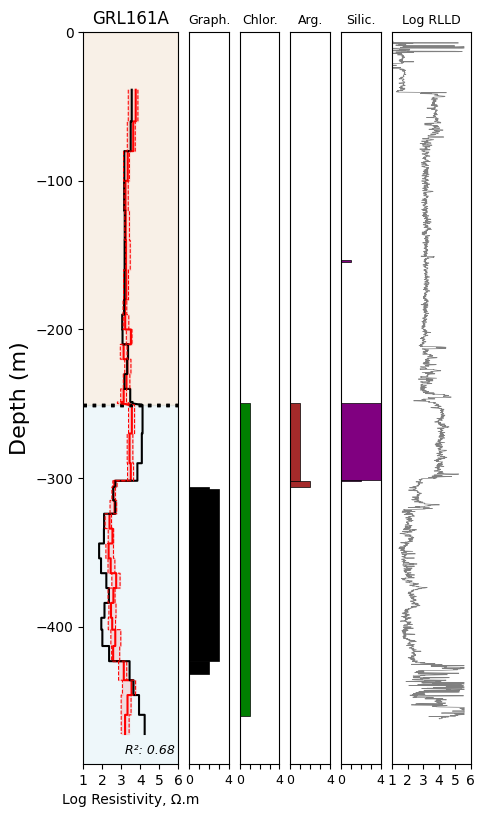

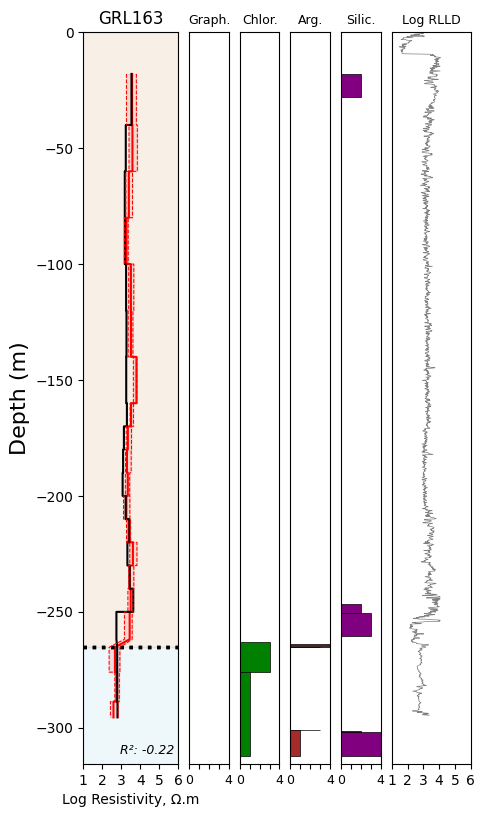

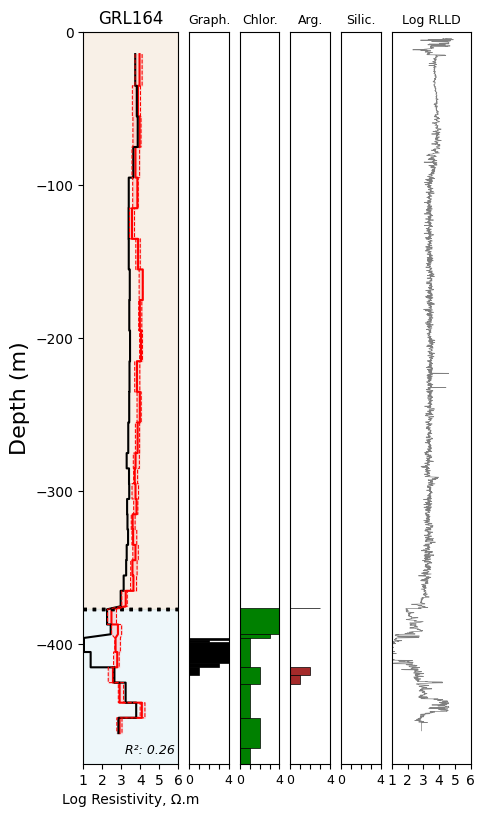

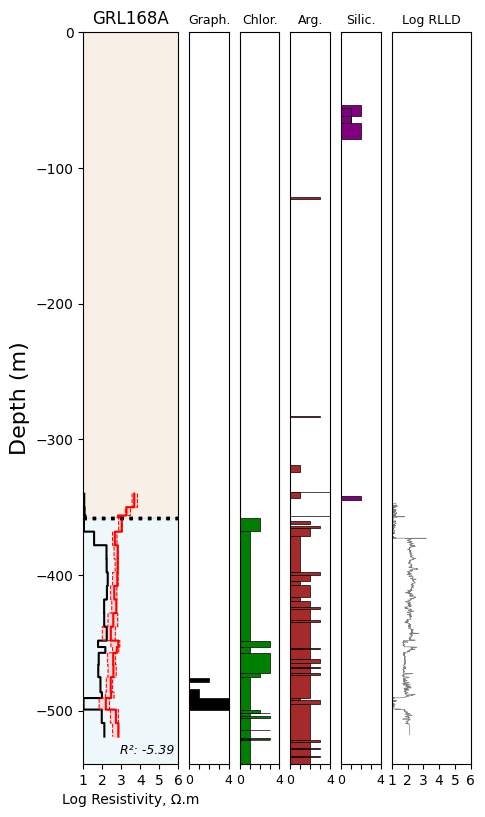

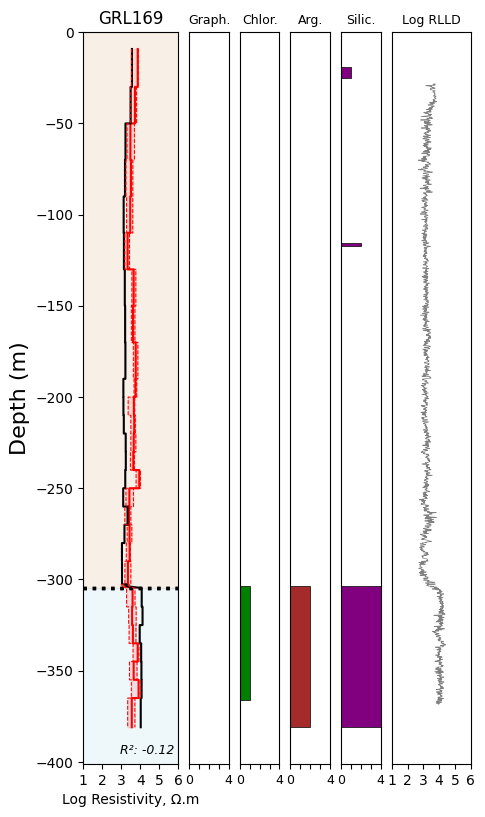

C:\Users\serdoun1\AppData\Roaming\Python\Python39\site-packages\matplotlib\axes\_base.py:2538: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


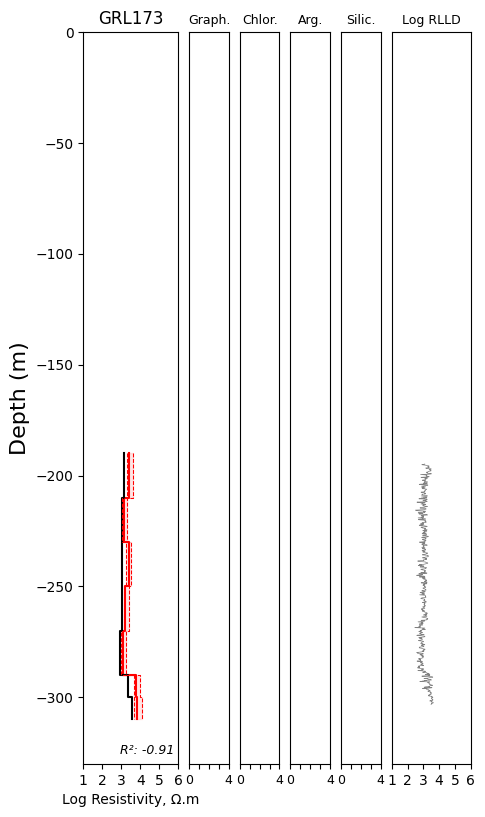

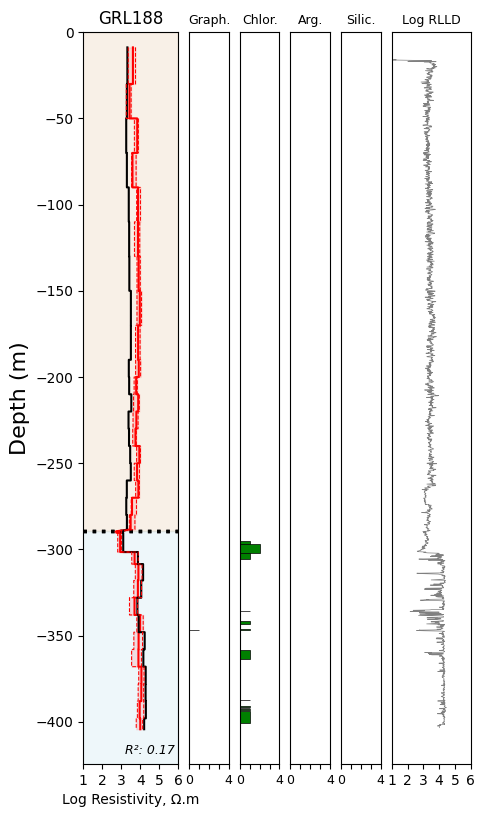

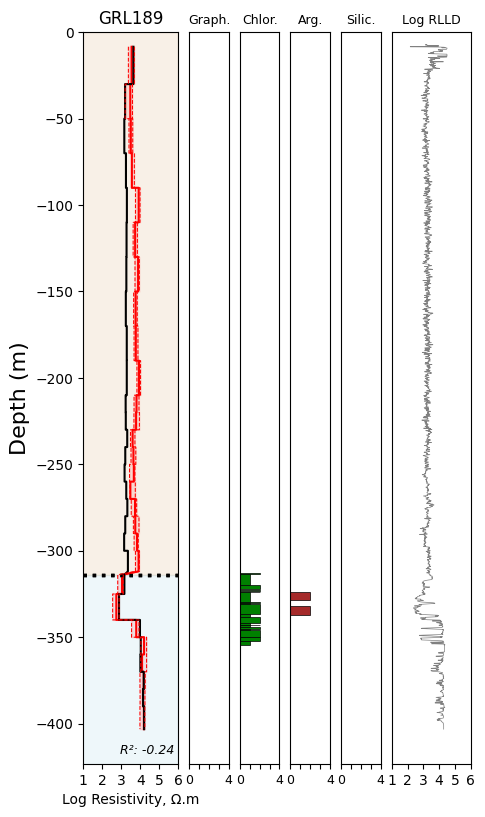

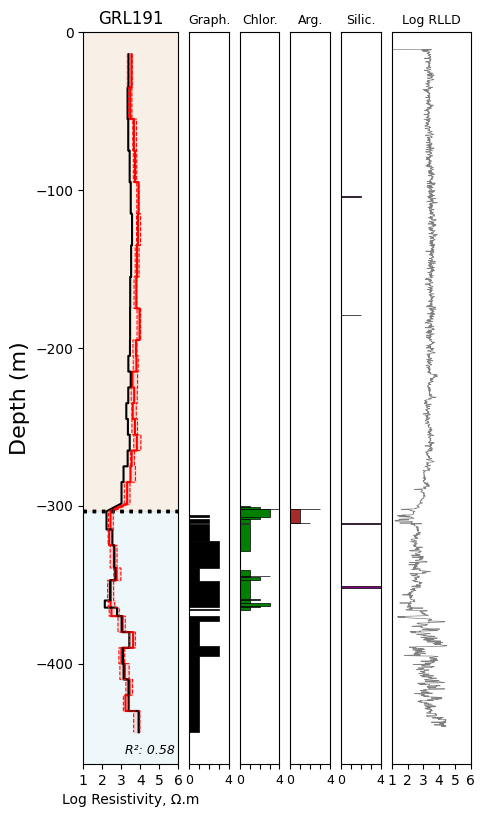

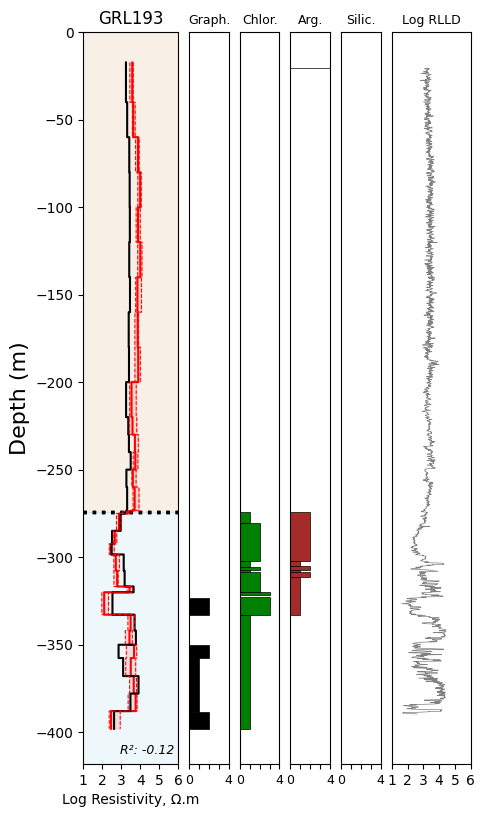

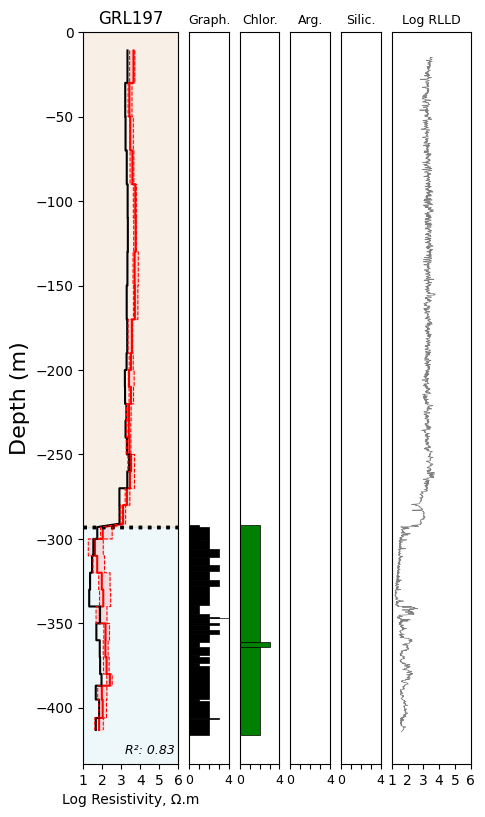

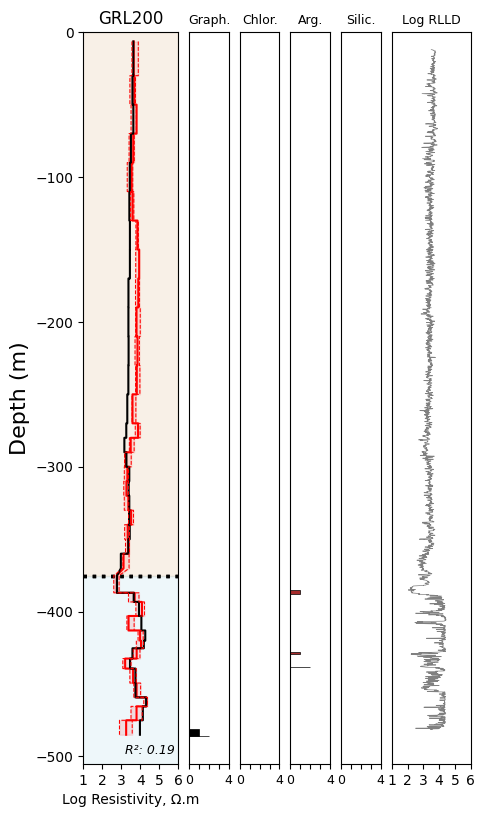

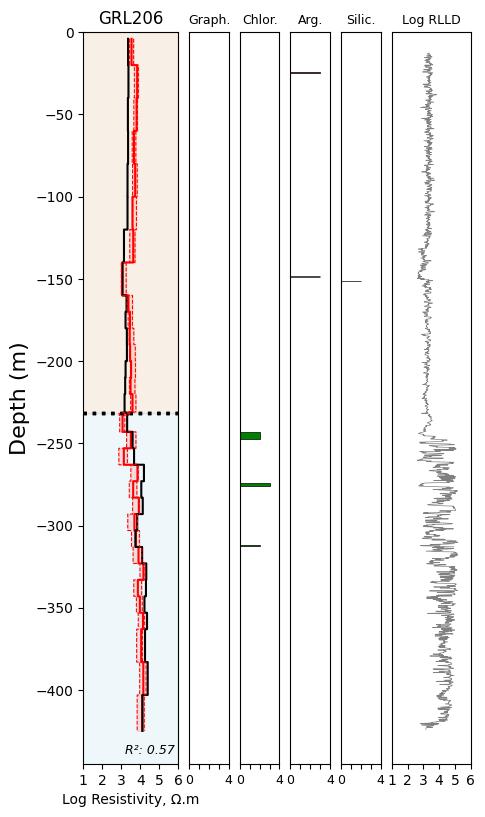

C:\Users\serdoun1\AppData\Roaming\Python\Python39\site-packages\matplotlib\axes\_base.py:2538: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


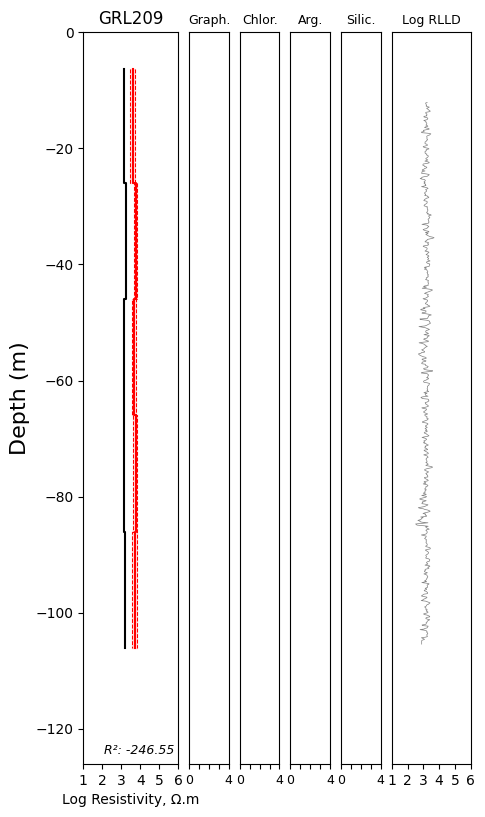

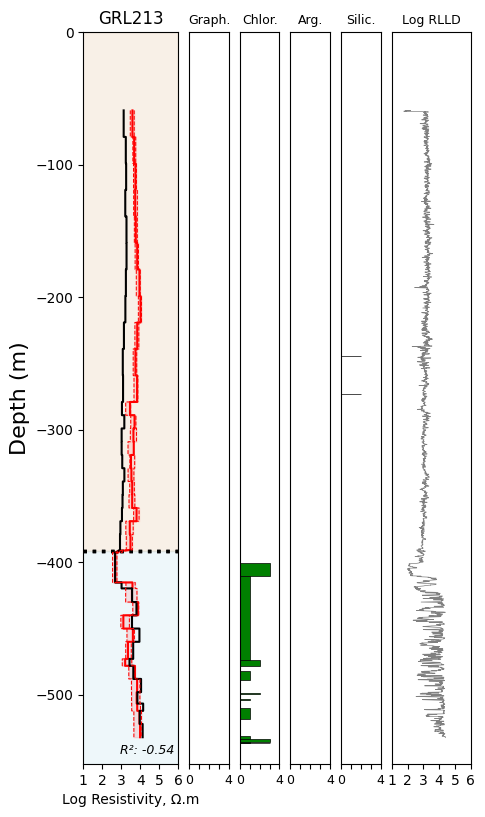

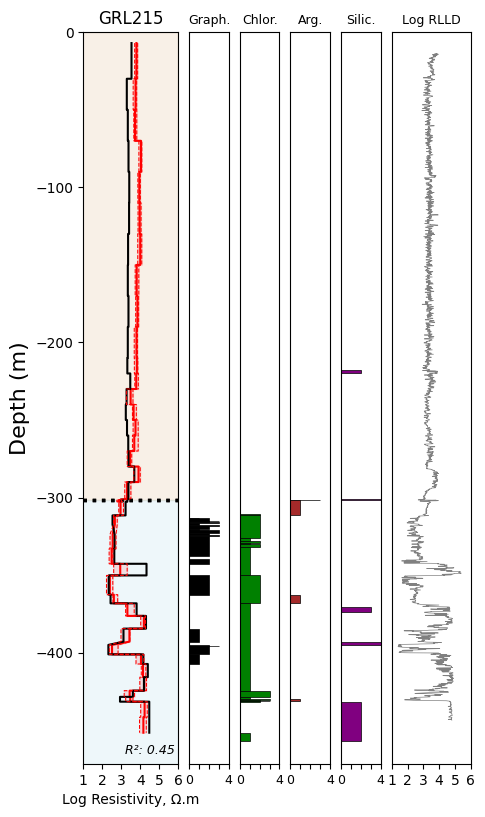

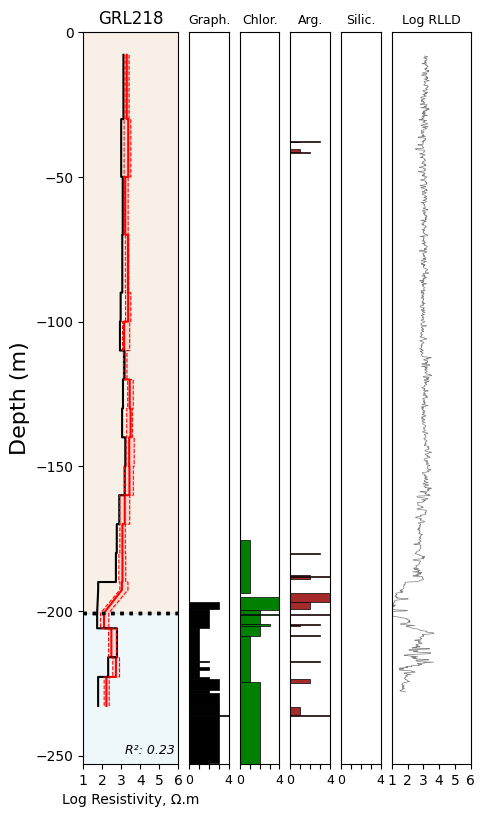

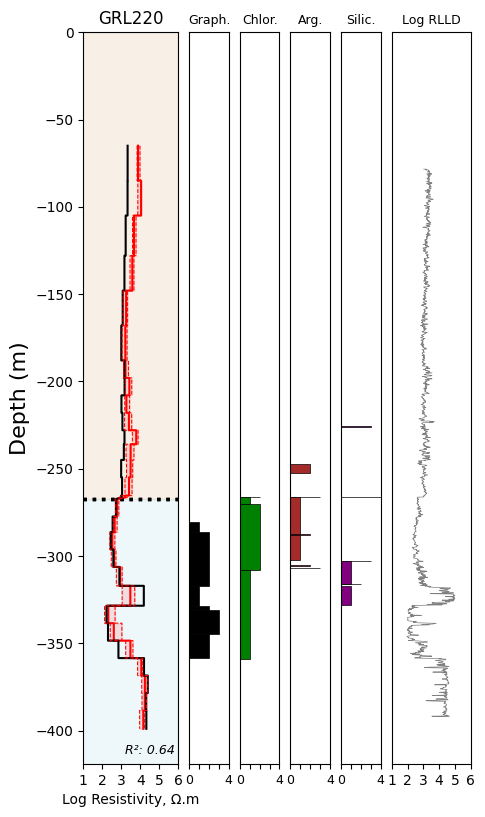

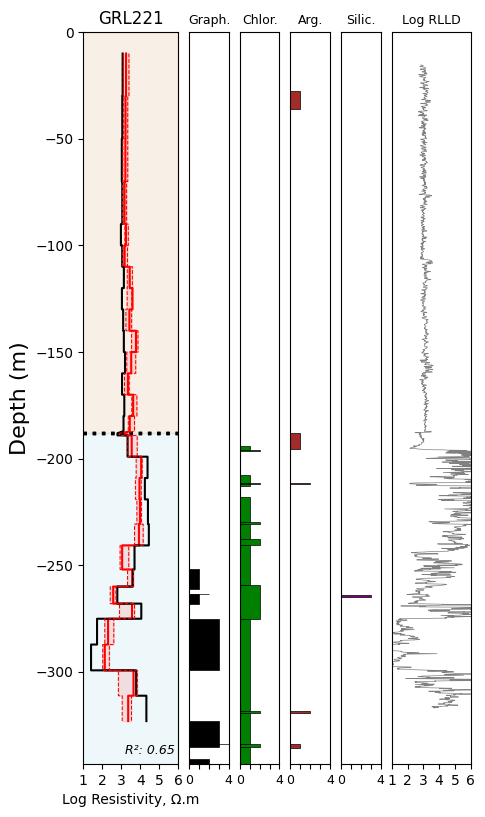

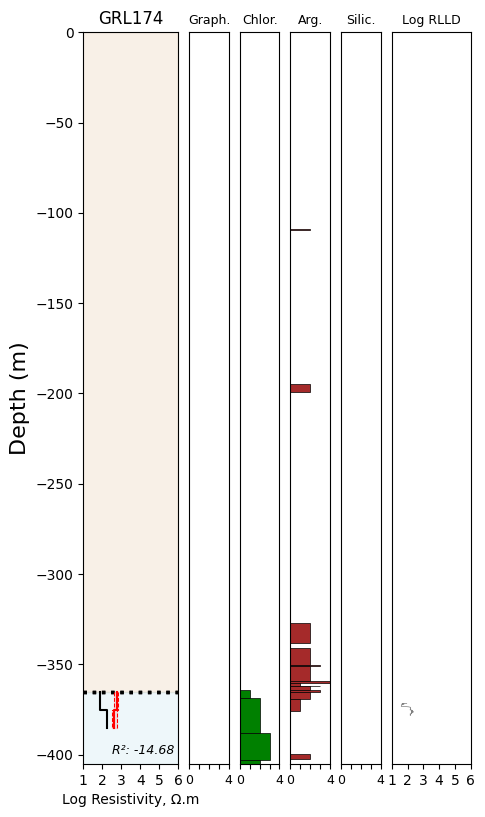

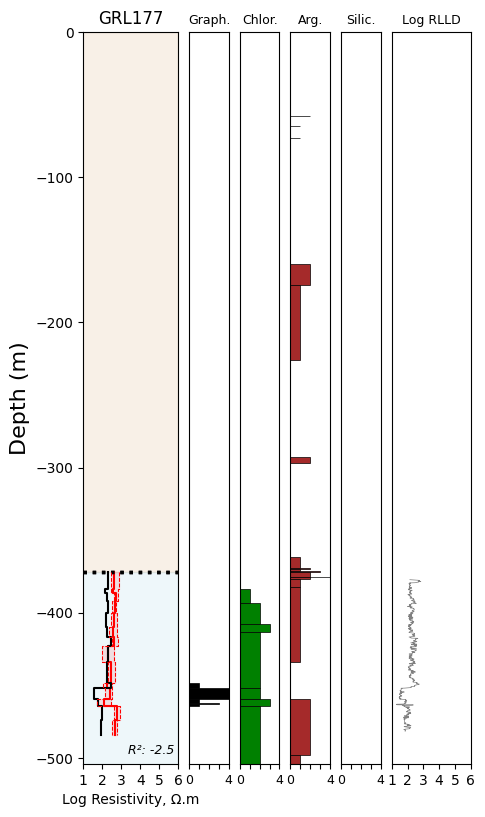

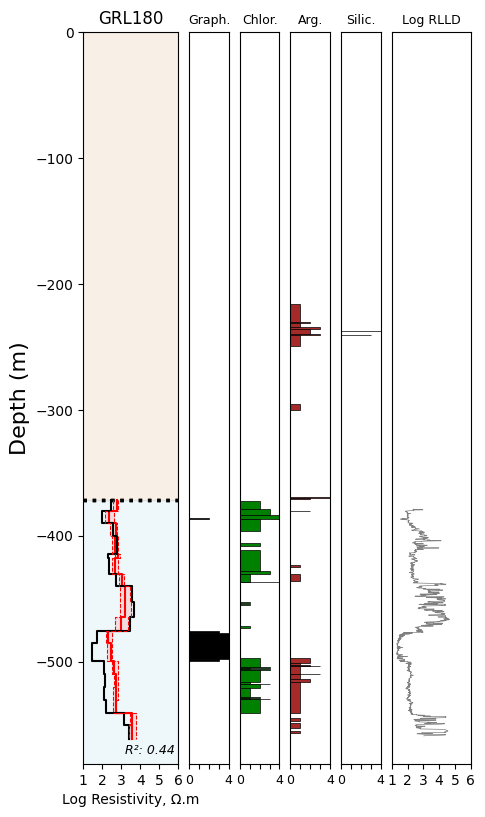

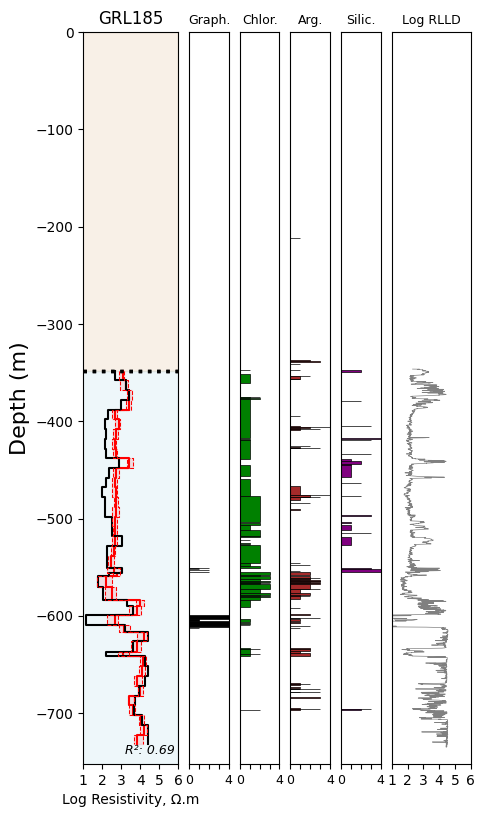

In [22]:
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from sklearn.metrics import r2_score

# Assuming all_data, graphite, chloritization, argilization, silicification, and rlld are your dataframes
holes_all_data = all_data['HOLEID'].unique()
holes_graphite = graphite['HoleName'].unique().tolist()

for hole_name in holes_all_data:
    # Plot synthetic log
    hole_data = all_data.loc[all_data['HOLEID'] == hole_name]
    uc_depth = -np.min(hole_data.loc[hole_data['Label'] == 'Basement']['Intervals'])
    score = np.round(r2_score (hole_data['LogRLLD'], hole_data['Predicted_Values']), 2)

    # Calculate R2 scores for basement and basin
    hole_data_basin = hole_data.loc[hole_data['Label'] == 'Basin']
    hole_data_basement = hole_data.loc[hole_data['Label'] == 'Basement']

    # Plot synthetic log and multiple logs next to graphite log in separate subplots
    if hole_name in holes_graphite:
        ddh_graphite = graphite.loc[graphite['HoleName'] == hole_name]

        # Assuming chloritization, argilization, and silicification have the same structure as graphite
        ddh_chloritization = chloritization.loc[chloritization['HoleName'] == hole_name]
        ddh_argilization = argilization.loc[argilization['HoleName'] == hole_name]
        ddh_silicification = silicification.loc[silicification['HoleName'] == hole_name]

        # Assuming rlld has the 'DEPTH' and 'RLLD' columns
        ddh_rlld = rlld.loc[rlld['HoleName'] == hole_name]

        # Specify the width ratios for the subplots
        fig, axs = plt.subplots(1, 6, figsize=(5, 9.5), gridspec_kw={'width_ratios': [3, 1.25, 1.25, 1.25, 1.25, 2.5]})  # 1 row, 6 columns

        # Plot synthetic log
        axs[0].hlines(uc_depth, 1, 6, linewidth=2.5, color='k', linestyle='dotted')

        axs[0].plot(hole_data['Predicted_Values'], -hole_data['Intervals'], c='r', linewidth=1.5)
        axs[0].hlines(uc_depth, 1, 6, linewidth=2.5, color='k', linestyle='dotted')

        axs[0].fill_between(np.array([0, 1, 6]), np.array([uc_depth, uc_depth, uc_depth]),
                            np.array([0, 0, 0]), color='burlywood', alpha=.2)
        axs[0].fill_between(np.array([0, 1, 6]), np.array([uc_depth, uc_depth, uc_depth]),
                            np.array([-1000, -1000, -1000]), color='lightblue', alpha=.2)

        axs[0].plot(hole_data['LogRLLD'], -hole_data['Intervals'], c='k', linewidth=1.5)
        axs[0].plot(hole_data['Lower_CI'], -hole_data['Intervals'], c='red', linestyle='dashed', linewidth=0.75)
        axs[0].plot(hole_data['Upper_CI'], -hole_data['Intervals'], c='red', linestyle='dashed', linewidth=0.75)
        axs[0].fill_betweenx(-hole_data['Intervals'], hole_data['Lower_CI'], hole_data['Upper_CI'], color='red', alpha=.1)
        axs[0].set_title(hole_name)
        axs[0].set_xlabel('Log Resistivity, Ω.m')
        axs[0].set_ylabel('Depth (m)', fontsize = 16)
        axs[0].set_ylim(-np.max(hole_data['Intervals']) - 20, 0)
        axs[0].set_xticks(np.arange(1, 7, 1))
        axs[0].set_xlim(1, 6)

        # Plot graphite log
        axs[1].set_xlim([0, 4])

        # Align the y-axis of the graphite log with the synthetic log
        axs[1].set_ylim(-np.max(hole_data['Intervals']) - 20, 0)

        for i in range(len(ddh_graphite)):
            rect = Rectangle((0, -ddh_graphite.iloc[i]['SAMPTO']),
                             ddh_graphite.iloc[i]['Degree'], ddh_graphite.iloc[i]['DIFF'],
                             edgecolor='k', facecolor='black', linewidth=0.5)
            axs[1].add_patch(rect)

        axs[1].tick_params(axis='y', labelsize=16)
        axs[1].set_yticks([])
        axs[1].set_xticks([0, 1, 2, 3, 4])
        axs[1].set_xticklabels([0,'', '', '',  4], fontsize=9)
        axs[1].set_title('Graph.', fontsize = 9)

        # Plot chloritization log
        axs[2].set_xlim([0, 4])
        axs[2].set_ylim(-np.max(hole_data['Intervals']) - 20, 0)

        for i in range(len(ddh_chloritization)):
            rect = Rectangle((0, -ddh_chloritization.iloc[i]['SAMPTO']),
                             ddh_chloritization.iloc[i]['Degree'], ddh_chloritization.iloc[i]['DIFF'],
                             edgecolor='k', facecolor='green', linewidth=0.5)
            axs[2].add_patch(rect)

        axs[2].set_yticks([])
        axs[2].set_xticks([0, 1, 2, 3, 4], size = 1)
        axs[2].set_xticklabels([0,'', '', '',  4], fontsize=9)
        axs[2].set_title('Chlor.', fontsize = 9)

        # Plot argilization log
        axs[3].set_xlim([0, 4])
        axs[3].set_ylim(-np.max(hole_data['Intervals']) - 20, 0)

        for i in range(len(ddh_argilization)):
            rect = Rectangle((0, -ddh_argilization.iloc[i]['SAMPTO']),
                             ddh_argilization.iloc[i]['Degree'], ddh_argilization.iloc[i]['DIFF'],
                             edgecolor='k', facecolor='brown', linewidth=0.5)
            axs[3].add_patch(rect)

        axs[3].set_yticks([])
        axs[3].set_xticks([0, 1, 2, 3, 4], size = 1)
        axs[3].set_xticklabels([0,'', '', '',  4], fontsize=9)
        axs[3].set_title('Arg.', fontsize = 9)

        # Plot silicification log
        axs[4].set_xlim([0, 4])
        axs[4].set_ylim(-np.max(hole_data['Intervals']) - 20, 0)

        for i in range(len(ddh_silicification)):
            rect = Rectangle((0, -ddh_silicification.iloc[i]['SAMPTO']),
                             ddh_silicification.iloc[i]['Degree'], ddh_silicification.iloc[i]['DIFF'],
                             edgecolor='k', facecolor='purple', linewidth=0.5)
            axs[4].add_patch(rect)

        axs[4].set_yticks([])
        axs[4].set_xticks([0, 1, 2, 3, 4], size = 1)
        axs[4].set_xticklabels([0,'', '', '',  4], fontsize=9)
        axs[4].set_title('Silic.', fontsize = 9)

        # Plot rlld log
        axs[5].plot(np.log10(ddh_rlld['RLLD']), -ddh_rlld['DEPTH'], c='grey', linewidth=0.5)
        axs[5].set_ylim(-np.max(hole_data['Intervals']) - 20, 0)
        axs[5].set_xlim(1, 6)

        axs[5].set_xticks(np.arange(1, 7, 1))
        axs[5].set_yticks([])
        axs[5].set_title('Log RLLD', fontsize = 9)
        text_x = axs[0].get_xlim()[1] - 0.035 * (axs[0].get_xlim()[1] - axs[0].get_xlim()[0])
        text_y = axs[0].get_ylim()[0] + 0.01 * (axs[0].get_ylim()[1] - axs[0].get_ylim()[0])

        axs[0].text(text_x, text_y, 'R²: ' + str(score), fontsize=9, color='black', ha='right', va='bottom', style = 'italic')


        plt.savefig(f"C:/Users/serdoun1/Desktop/Article_Petrophysics/Figures/Logs/{hole_name}_combined.png", bbox_inches='tight')
        plt.savefig(f"C:/Users/serdoun1/Desktop/Article_Petrophysics/Figures/Logs/{hole_name}_combined.pdf", bbox_inches='tight')
        plt.show()
